In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
df_birth = pd.read_excel('data_birth_combined.xlsx')
df_birth.head()

,state,1992,1998,2005,2015,2019
0,Andhra Pradesh,11517,10933,13669,18311,18538
1,Arunachal Pradesh,2728,3219,3833,26936,33319
2,Assam,10409,9893,7532,51952,57933
3,Bihar,19072,23056,10448,109109,97677
4,Delhi,9869,6837,6484,9281,17215


In [248]:
df_death = pd.read_excel('data_death_combined.xlsx')
df_death.head()

,state,1992,1998,2005,2015,2019
0,Andhra Pradesh,664,671,547,735,663
1,Arunachal Pradesh,92,87,155,330,236
2,Assam,638,353,417,1876,1414
3,Bihar,1069,1192,547,4486,4033
4,Delhi,389,223,242,211,350


In [249]:
year = np.array(pd.to_numeric(df_birth.columns[1:])).reshape(-1,1)
birth_values = df_birth.values[:,1:].astype(int)
death_values = df_death.values[:,1:].astype(int)
neonatal_mortality = death_values/birth_values*1000

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()

poly = PolynomialFeatures(2)
PLR = LinearRegression()

In [251]:
year_trans = poly.fit_transform(year)

In [252]:
# predict the neonatal_mortality in 2030
lr_predict_1 = []
plr_predict_1 =[]
for n in neonatal_mortality:
    reg = LR.fit(year,n)
    poly_reg = PLR.fit(year_trans,n)

    lr_predict_1.append(reg.predict([[2030]])[0])
    plr_predict_1.append(poly_reg.predict(poly.fit_transform([[2030]]))[0])

In [253]:
states = np.array(df_birth["state"])
states

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnatka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [254]:
neonatal_mortality[0:4]

array([[57.65390293, 61.37382237, 40.01755798, 40.13980667, 35.76437588],
       [33.72434018, 27.02702703, 40.43829898, 12.25126225,  7.08304571],
       [61.29311173, 35.68179521, 55.3637812 , 36.11025562, 24.40750522],
       [56.05075503, 51.70020819, 52.35451761, 41.11484845, 41.28914688]])

In [255]:
df_final_1 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_1.insert(0,"state",states)
df_final_1.insert(6,"2030(lr)",lr_predict_1)
df_final_1.insert(7,"2030(plr)",plr_predict_1)
df_final_1

,state,1992,1998,2005,2015,2019,2030(lr),2030(plr)
0,Andhra Pradesh,57.653903,61.373822,40.017558,40.139807,35.764376,24.960799,31.538638
1,Arunachal Pradesh,33.724340,27.027027,40.438299,12.251262,7.083046,0.305150,-37.477426
2,Assam,61.293112,35.681795,55.363781,36.110256,24.407505,18.216816,7.072961
3,Bihar,56.050755,51.700208,52.354518,41.114848,41.289147,34.508140,29.500781
4,Delhi,39.416354,32.616645,37.322640,22.734619,20.331107,13.870010,2.252256
5,Goa,32.231978,36.136206,21.247740,11.431184,5.834829,-5.224437,-16.932168
6,Gujarat,51.156584,53.033749,50.177846,32.350212,27.401095,19.114248,-7.407614
7,Haryana,51.669675,38.719964,31.850192,22.010021,30.163693,14.042452,42.681583
8,Himachal Pradesh,39.337717,25.227926,23.272467,29.338549,24.745442,20.723528,46.184331
9,Jammu & Kashmir,35.803497,44.149630,40.346730,27.683039,8.965033,7.809729,-42.403711


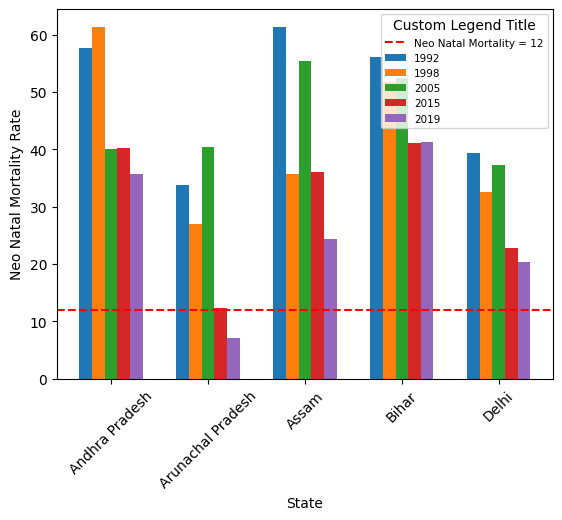

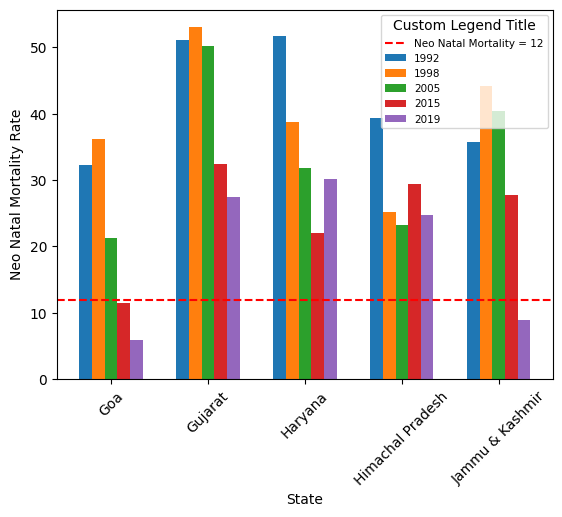

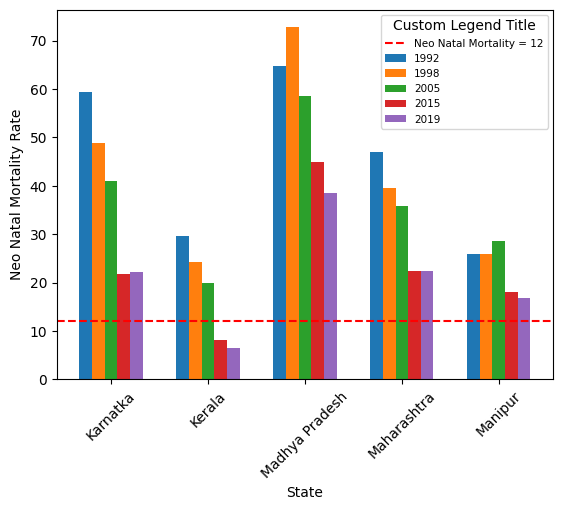

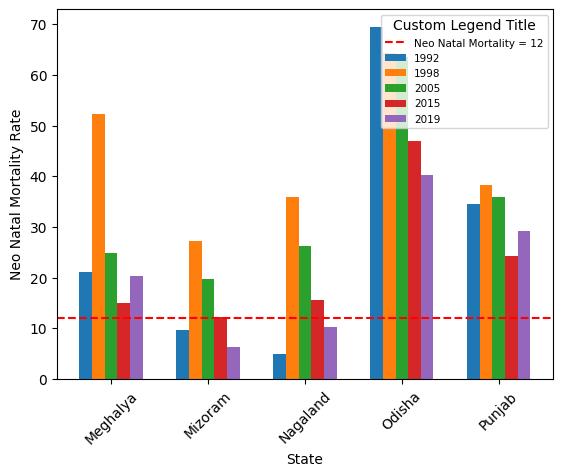

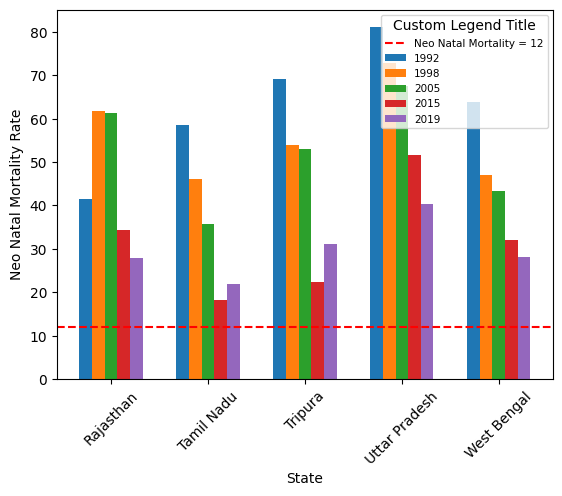

In [256]:
#Bar Plot
def plot_bar_chart(start_idx, end_idx):
    df = df_final_1
    
    
# Common settings
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    years = df_final_1.columns[1:6].tolist()
    legend_title = 'Custom Legend Title'
    legend_labels = ["Neo Natal Mortality = 12"] + years
    legend_properties = {'size': 7.5}
    states = df_final_1["state"].tolist()
    ticks = [0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 8]
    flag = 0
        
    X_axis = 0.0
    
    dummy = []
    

    for i in range(start_idx, end_idx):
        for j in range(1, 6):
            if(j == 3):
                dummy.append(X_axis + 0.15 * ticks[flag])
            plt.bar(X_axis + 0.15 * ticks[flag], df.iloc[i, j], width=0.15, label=years[j - 1], color=colors[j - 1])
            flag += 1
        X_axis += 1

    plt.axhline(y=12, color='red', linestyle='--', label='Neo-Natal Mortality = 12')
    plt.xticks(dummy, states[start_idx:end_idx], rotation = 45)
    plt.legend(legend_labels, loc='upper right', title=legend_title, prop=legend_properties)
    plt.ylabel("Neo Natal Mortality Rate")
    plt.xlabel("State")
    plt.show()
    X_axis = 0.0

# Sample data (replace this with your actual data)

# Loop through the desired ranges
for start_idx in range(0, 25, 5):
    end_idx = start_idx + 5
    plot_bar_chart(start_idx, end_idx)


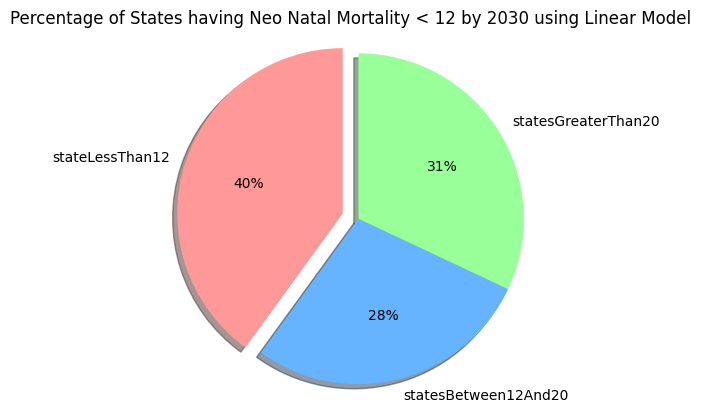

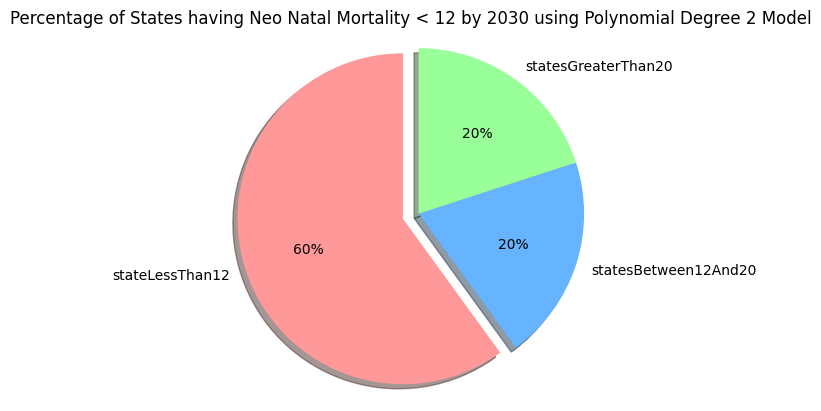

In [257]:
def pie_charts(col, title):
    stateLessThan12 = (df_final_1[col]<=12).sum()
    statesBetween12And20 = ((df_final_1[col]>12) & (df_final_1[col] <=20)).sum()
    statesGreaterThan20 = (df_final_1[col]>20).sum()
    total = stateLessThan12+statesBetween12And20+statesGreaterThan20

    labels = ["stateLessThan12", "statesBetween12And20", "statesGreaterThan20"]
    percentage = [stateLessThan12, statesBetween12And20, statesGreaterThan20]

    colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each variable
    explode = (0.1, 0, 0)  # Separate Variable A with a 3D effect

    fig, ax = plt.subplots()
    ax.pie(percentage, explode=explode, labels=labels, autopct='%d%%', startangle=90, shadow=True, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

pie_charts("2030(lr)", 'Percentage of States having Neo Natal Mortality < 12 by 2030 using Linear Model')
pie_charts("2030(plr)", 'Percentage of States having Neo Natal Mortality < 12 by 2030 using Polynomial Degree 2 Model')
    

In [258]:
# predict the year in which neonatal_mortality will reach 12
lr_predict_2 = []
plr_predict_2 =[]
year = year.flatten()
for n in neonatal_mortality:
    reg = LR.fit(n.reshape(-1,1),year)
    poly_reg = PLR.fit(poly.fit_transform(n.reshape(-1,1)),year)

    lr_predict_2.append(reg.predict([[12]])[0])
    plr_predict_2.append(poly_reg.predict(poly.fit_transform([[12]]))[0])

In [259]:
df_final_2 = pd.DataFrame(neonatal_mortality,columns=df_birth.columns[1:])
df_final_2.insert(0,"state",states)
df_final_2.insert(6,"NMR-12(lr)",lr_predict_2)
df_final_2.insert(7,"NMR-12(plr)",plr_predict_2)
df_final_2

,state,1992,1998,2005,2015,2019,NMR-12(lr),NMR-12(plr)
0,Andhra Pradesh,57.653903,61.373822,40.017558,40.139807,35.764376,2035.808271,2129.646325
1,Arunachal Pradesh,33.724340,27.027027,40.438299,12.251262,7.083046,2013.419099,2011.740644
2,Assam,61.293112,35.681795,55.363781,36.110256,24.407505,2022.638854,2027.890988
3,Bihar,56.050755,51.700208,52.354518,41.114848,41.289147,2062.951785,1997.635079
4,Delhi,39.416354,32.616645,37.322640,22.734619,20.331107,2027.830419,2037.408194
5,Goa,32.231978,36.136206,21.247740,11.431184,5.834829,2013.586044,2012.823214
6,Gujarat,51.156584,53.033749,50.177846,32.350212,27.401095,2032.612766,2025.316144
7,Haryana,51.669675,38.719964,31.850192,22.010021,30.163693,2026.188467,2026.819285
8,Himachal Pradesh,39.337717,25.227926,23.272467,29.338549,24.745442,2021.364254,1947.759287
9,Jammu & Kashmir,35.803497,44.149630,40.346730,27.683039,8.965033,2018.186107,2018.154409


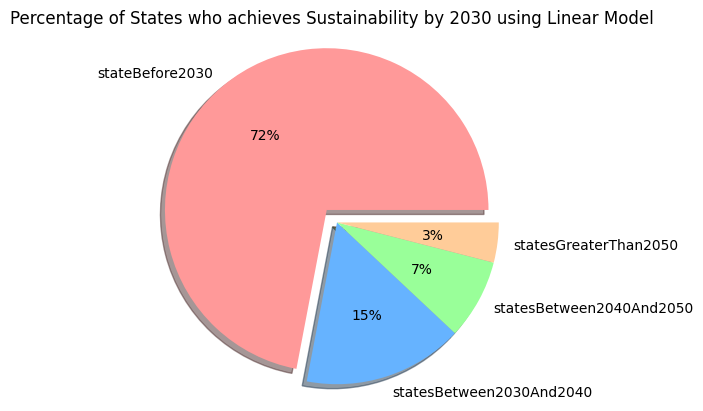

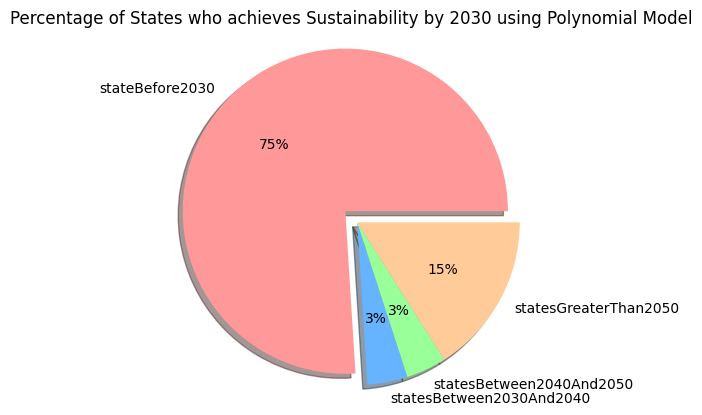

In [260]:
def pie_chart_2030(col, title):
    stateBefore2030 = (df_final_2[col]<=2030).sum()
    statesBetween2030And2040= ((df_final_2[col]>2030) & (df_final_2[col] <=2040)).sum()
    statesBetween2040And2050= ((df_final_2[col]>2040) & (df_final_2[col] <=2050)).sum()
    statesGreaterThan2050 = (df_final_2[col]>2050).sum()
    total = stateBefore2030+statesBetween2030And2040+statesBetween2040And2050+statesGreaterThan2050

    labels = ["stateBefore2030", "statesBetween2030And2040", "statesBetween2040And2050", "statesGreaterThan2050"]
    percentage = [stateBefore2030, statesBetween2030And2040, statesBetween2040And2050, statesGreaterThan2050]

    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for each variable
    explode = (0.1, 0, 0, 0)  # Separate Variable A with a 3D effect

    fig, ax = plt.subplots()
    ax.pie(percentage, explode=explode, labels=labels, autopct='%d%%', shadow=True, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    ax.set_title(title)
    plt.show()

pie_chart_2030("NMR-12(lr)", 'Percentage of States who achieves Sustainability by 2030 using Linear Model')
pie_chart_2030("NMR-12(plr)", 'Percentage of States who achieves Sustainability by 2030 using Polynomial Model')
